### __Importamos los datos__

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

### __importamos los datasets__

In [54]:
df_train_values = pd.read_csv('../datasets/train_values.csv')
df_train_labels = pd.read_csv('../datasets/train_labels.csv')

#### __Analisis de Geo Level 1__

Queremos saber en qué zonas geográfficas de nivel 1 hubieron mayor cantidad de destrucciones y analizar algunos puntos interesantes que puedan aparecer.

In [55]:
df_train_values_filtered = df_train_values.loc[:, ['building_id', 'geo_level_1_id']]

In [56]:
total_buildings_by_level_1 = df_train_values_filtered\
    .groupby('geo_level_1_id')\
    .count()\
    .reset_index()\
    .rename(columns={ 'building_id': 'total_building_by_geo_1' })
total_buildings_by_level_1.head(10)

,geo_level_1_id,total_building_by_geo_1
0,0,4011
1,1,2701
2,2,931
3,3,7540
4,4,14568
5,5,2690
6,6,24381
7,7,18994
8,8,19080
9,9,3958


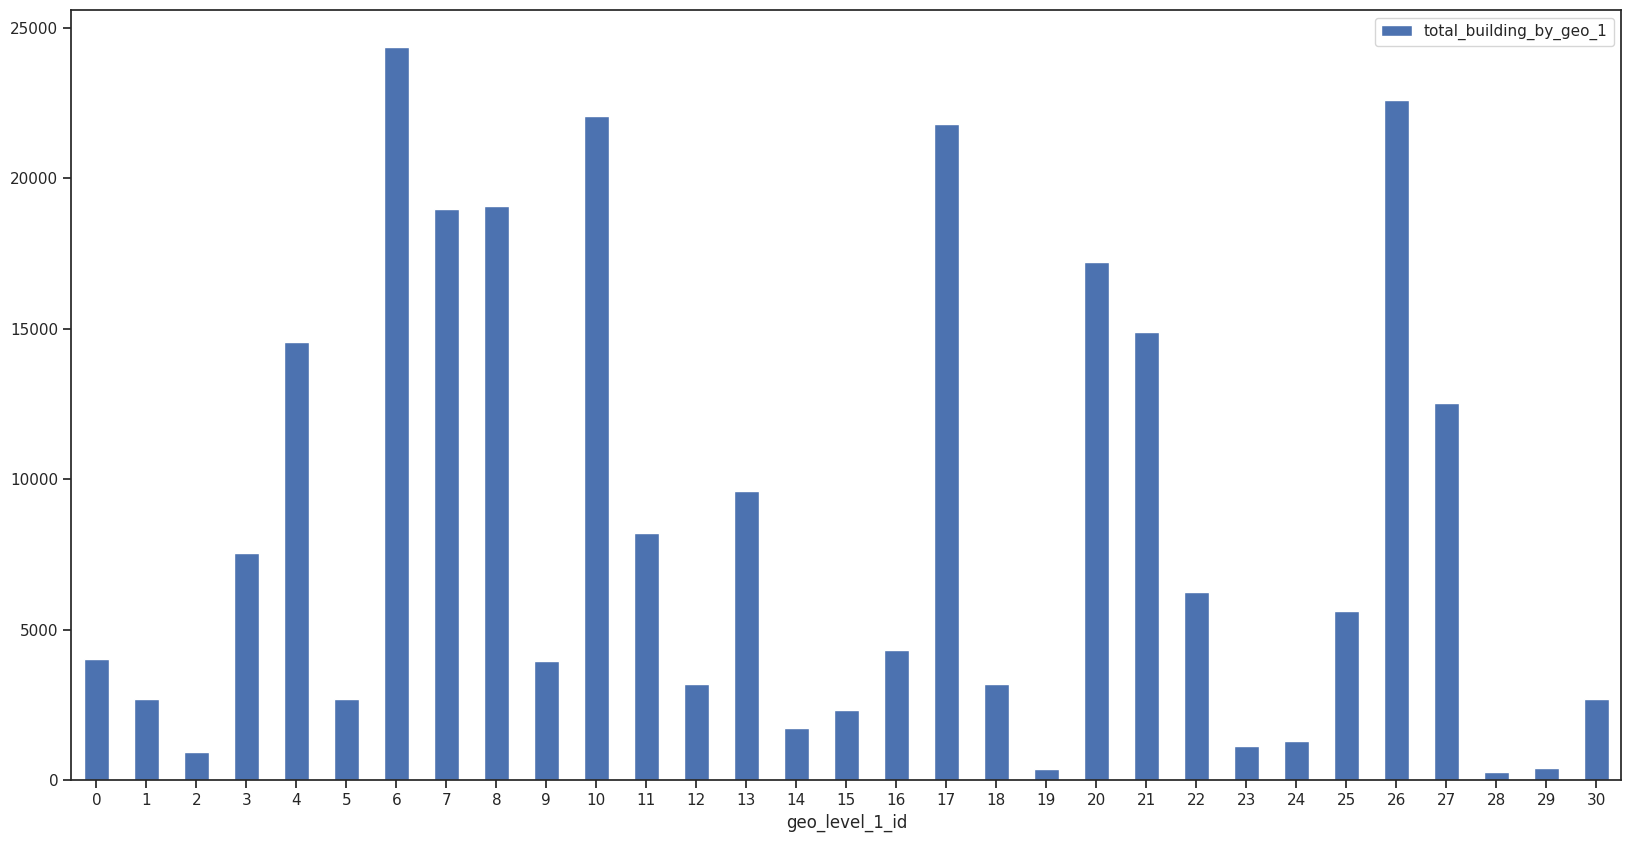

In [104]:
total_buildings_by_level_plot = total_buildings_by_level_1.plot.bar(x='geo_level_1_id', y='total_building_by_geo_1', rot=0)

#### Merge

In [68]:
df_merged_by_geo_and_damage = df_train_values_filtered.merge(df_train_labels)

In [93]:
df_grouped_by_geo_and_damage = df_merged_by_geo_and_damage\
    .groupby(['geo_level_1_id', 'damage_grade'])\
    .count()\
    .reset_index()\
    .rename(columns={'building_id': 'total_buildings_by_geo_and_samage'})

#### Calcular el porcentaje

In [89]:
df_total_buildings_by_geo = df_merged_by_geo_and_damage\
    .groupby('geo_level_1_id')\
    .count()\
    .reset_index()\
    .rename(columns = { 'building_id': 'total_building_by_geo' })[['geo_level_1_id', 'total_building_by_geo']]

In [110]:
df_percentage_by_geo_ang_damage = df_grouped_by_geo_and_damage.merge(df_total_buildings_by_geo)
df_percentage_by_geo_ang_damage['percentage'] = (df_percentage_by_geo_ang_damage['total_buildings_by_geo_and_samage'] * 100) / df_percentage_by_geo_ang_damage['total_building_by_geo']

In [111]:
df_pivot_by_geo_ang_damage = df_percentage_by_geo_ang_damage.pivot(index='geo_level_1_id', columns='damage_grade',values='percentage')

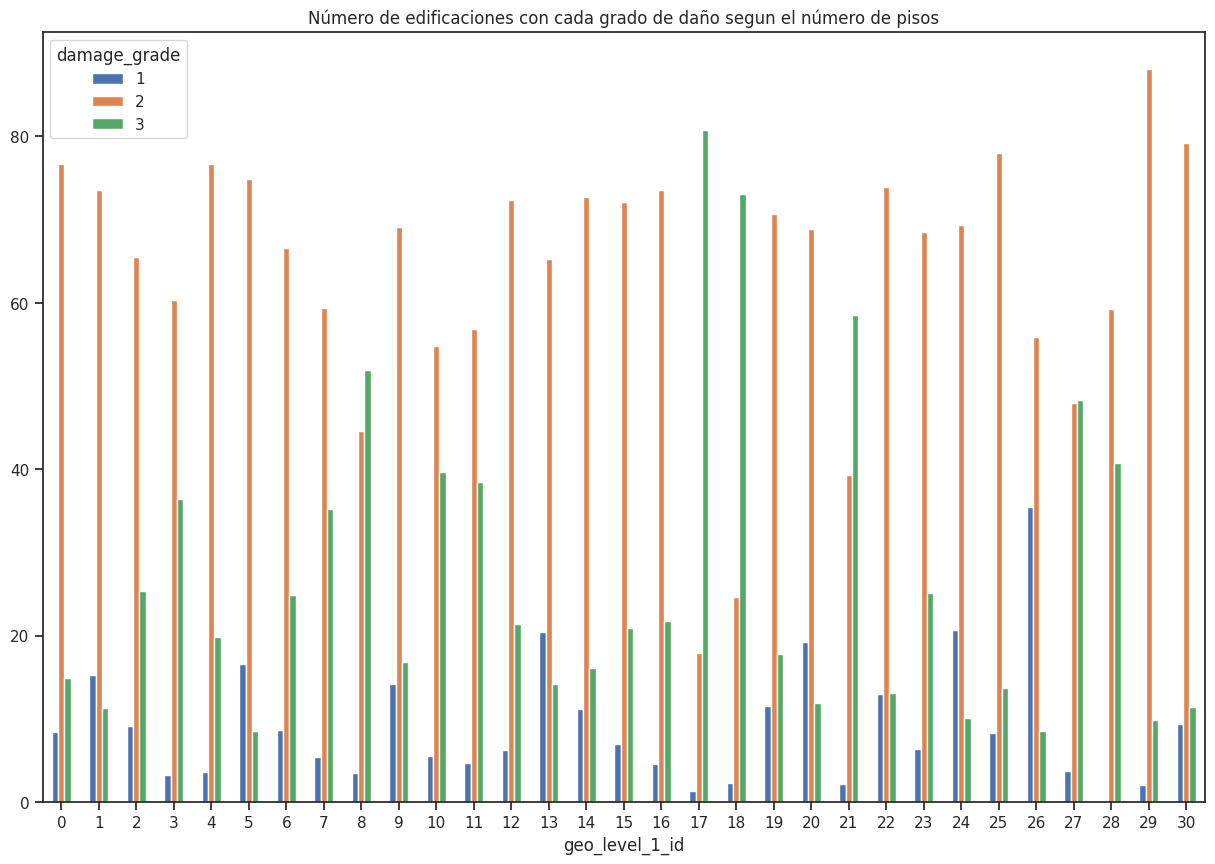

In [112]:
ax = df_pivot_by_geo_ang_damage.plot(\
    kind='bar',\
    figsize=(15,10),\
    rot=0,\
    title='Número de edificaciones con cada grado de daño segun el número de pisos'\
)

Como era de esperarse, hay lugares que sufrieron muchos daños en comparación a otros, sobre todo con respecto al daño de nivel 3 que son los relevantes. Ahora de acá puede salir otra cuestión:

Tendrán relación las zonas geográficas mas golpeadas en cantidad con las que mayor cantidad de daños nivel 3 tienen?

In [115]:
loc_filter = total_buildings_by_level_1['total_building_by_geo_1'] > 15000
df_percentage_by_geo_ang_damage_filtered = total_buildings_by_level_1\
    .loc[loc_filter, ['geo_level_1_id']]\
    .merge(df_percentage_by_geo_ang_damage)

In [116]:
df_pivot_by_geo_ang_damage_filtered = df_percentage_by_geo_ang_damage_filtered.pivot(index='geo_level_1_id', columns='damage_grade',values='percentage')

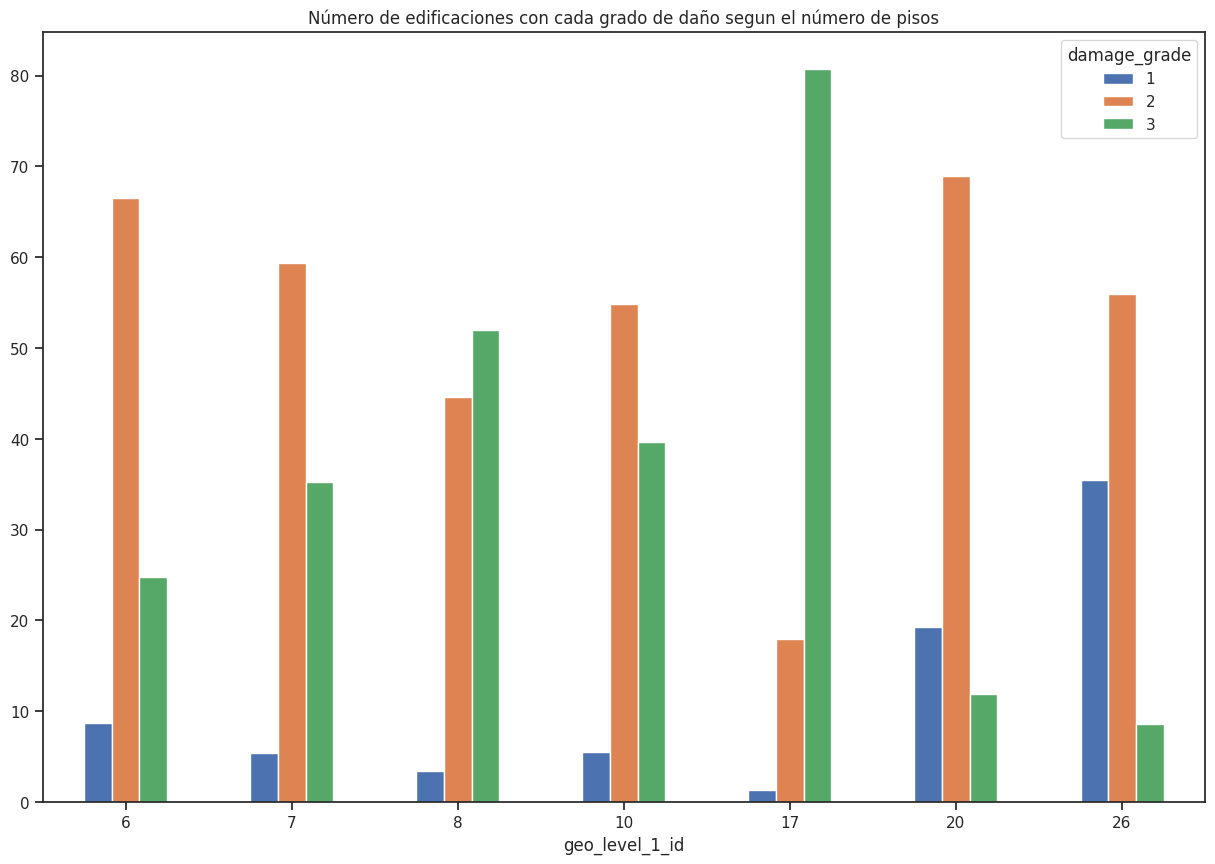

In [117]:
ax = df_pivot_by_geo_ang_damage_filtered.plot(\
    kind='bar',\
    figsize=(15,10),\
    rot=0,\
    title='Número de edificaciones con cada grado de daño segun el número de pisos'\
)

Podríamos decir que parte del las zonas con mas de 15.000 edificios registrados, tienen una gran cantidad de daños de nivel 3 por encima del promedio. 

Una nueva pregunta podría ser:

Por que las zonas 20 y 26 han tenido tantos edificios dañados pero una propoción tan alta de edificios con nivel 1?

In [122]:
df_undamaged_zones = df_train_values.loc[(df_train_values['geo_level_1_id'] == 20) | (df_train_values['geo_level_1_id'] == 26), :]

#### observo la antiguedad

In [143]:
df_undamaged_zones.groupby(['age', 'count_floors_pre_eq']).count()

building_id  geo_level_1_id  geo_level_2_id  \
age count_floors_pre_eq                                                
0   1                           3531            3531            3531   
    2                           3458            3458            3458   
    3                            159             159             159   
    4                             16              16              16   
    5                              3               3               3   
...                              ...             ...             ...   
200 3                              1               1               1   
995 1                             38              38              38   
    2                            102             102             102   
    3                             12              12              12   
    4                              1               1               1   

                         geo_level_3_id  area_percentage  height_percentage  \
age count_floors_pre_eq                                                       
0   1                              3531             3531               3531   
    2                              3458             3458               3458   
    3                               159              159                159   
    4                                16               16                 16   
    5                                 3                3                  3   
...                                 ...              ...                ...   
200 3                                 1                1                  1   
995 1                                38               38                 38   
    2                               102              102                102   
    3                                12               12                 12   
    4                                 1                1                  1   

                         land_surface_condition  foundation_type  roof_type  \
age count_floors_pre_eq                                                       
0   1                                      3531             3531       3531   
    2                                      3458             3458       3458   
    3                                       159              159        159   
    4                                        16               16         16   
    5                                         3                3          3   
...                                         ...              ...        ...   
200 3                                         1                1          1   
995 1                                        38               38         38   
    2                                       102              102        102   
    3                                        12               12         12   
    4                                         1                1          1   

                         ground_floor_type  ...  has_secondary_use_hotel  \
age count_floors_pre_eq                     ...                            
0   1                                 3531  ...                     3531   
    2                                 3458  ...                     3458   
    3                                  159  ...                      159   
    4                                   16  ...                       16   
    5                                    3  ...                        3   
...                                    ...  ...                      ...   
200 3                                    1  ...                        1   
995 1                                   38  ...                       38   
    2                                  102  ...                      102   
    3                                   12  ...                       12   
    4                                    1  ...                        1   

                         has_secondary_use_

Podemos ver que estas dos zonas tienen un promedio de pisos del 1.74%